In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
%matplotlib inline
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [2]:
 
# Models from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor
 
# Model Evaluations
 
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
 

In [3]:
df = pd.read_csv('BNB_USD.csv')
# data2 = pd.read_csv('')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      366 non-null    object 
 1   Price     366 non-null    float64
 2   Open      366 non-null    float64
 3   High      366 non-null    float64
 4   Low       366 non-null    float64
 5   Vol.      366 non-null    object 
 6   Change %  366 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.1+ KB


In [7]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 02, 2020",17.53,17.38,17.57,17.30,3.01M,0.43%
1,"May 03, 2020",17.11,17.54,17.79,16.87,2.62M,-2.44%
2,"May 04, 2020",17.02,17.08,17.28,16.32,2.76M,-0.51%
3,"May 05, 2020",16.89,17.05,17.29,16.61,2.61M,-0.78%
4,"May 06, 2020",16.38,16.88,17.13,16.33,2.72M,-2.99%


In [6]:
## convert from String to datetime
for x in df["Date"]:
    x = dt.datetime.strptime(x, "%b %d, %Y")

In [16]:
df["Date"]

0      May 02, 2020
1      May 03, 2020
2      May 04, 2020
3      May 05, 2020
4      May 06, 2020
           ...     
361    Apr 28, 2021
362    Apr 29, 2021
363    Apr 30, 2021
364    May 01, 2021
365    May 02, 2021
Name: Date, Length: 366, dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      366 non-null    object 
 1   Price     366 non-null    float64
 2   Open      366 non-null    float64
 3   High      366 non-null    float64
 4   Low       366 non-null    float64
 5   Vol.      366 non-null    object 
 6   Change %  366 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.1+ KB


In [19]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 02, 2020",17.53,17.38,17.57,17.30,3.01M,0.43%
1,"May 03, 2020",17.11,17.54,17.79,16.87,2.62M,-2.44%
2,"May 04, 2020",17.02,17.08,17.28,16.32,2.76M,-0.51%
3,"May 05, 2020",16.89,17.05,17.29,16.61,2.61M,-0.78%
4,"May 06, 2020",16.38,16.88,17.13,16.33,2.72M,-2.99%


In [29]:
df["Vol."] = df["Vol."].astype(float)

3010000.0

In [34]:
for ind, x in df.iterrows():
    print(ind,x["Vol."])
    df["Vol."][ind] = float(x["Vol."].replace("M", ""))*1000000

0 3.01M
1 2.62M
2 2.76M
3 2.61M
4 2.72M
5 3.03M
6 2.62M
7 2.23M
8 2.91M
9 2.73M
10 3.03M
11 2.81M
12 2.80M
13 2.31M
14 2.73M
15 2.89M
16 3.12M
17 3.25M
18 2.40M
19 2.16M
20 2.52M
21 2.30M
22 2.27M
23 2.36M
24 2.01M
25 2.61M
26 2.87M
27 2.60M
28 2.97M
29 2.61M
30 2.99M
31 2.54M
32 2.65M
33 2.32M
34 2.45M
35 2.11M
36 1.82M
37 1.66M
38 1.63M
39 1.81M
40 1.80M
41 1.93M
42 2.02M
43 1.70M
44 1.52M
45 1.61M
46 1.50M
47 1.38M
48 1.32M
49 1.43M
50 1.32M
51 1.71M
52 1.45M
53 1.53M
54 1.20M
55 1.04M
56 1.31M
57 1.40M
58 1.51M
59 1.31M
60 1.61M
61 1.40M
62 1.21M
63 1.32M
64 1.12M
65 1.61M
66 1.88M
67 2.27M
68 1.87M
69 2.10M
70 2.32M
71 2.99M
72 3.23M
73 2.38M
74 1.96M
75 2.05M
76 1.86M
77 1.69M
78 2.60M
79 2.49M
80 2.11M
81 2.17M
82 2.39M
83 2.79M
84 2.96M
85 2.86M
86 3.84M
87 3.52M
88 2.23M
89 2.06M
90 2.24M
91 2.66M
92 3.36M
93 2.67M
94 2.39M
95 3.69M
96 2.45M
97 2.77M
98 2.41M
99 2.11M
100 2.11M
101 3.21M
102 2.46M
103 3.08M
104 3.82M
105 2.74M
106 2.72M
107 2.42M
108 2.53M
109 2.13M
110 2.24M


<ipython-input-34-3322643cf263>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Vol."][ind] = float(x["Vol."].replace("M", ""))*1000000


 7.02M
242 2.42M
243 1.89M
244 2.43M
245 3.02M
246 4.90M
247 5.30M
248 3.51M
249 3.78M
250 5.02M
251 3.56M
252 2.72M
253 4.28M
254 6.37M
255 3.26M
256 3.51M
257 3.31M
258 3.43M
259 3.25M
260 3.88M
261 3.07M
262 5.15M
263 3.71M
264 3.46M
265 3.08M
266 2.54M
267 2.34M
268 2.77M
269 2.76M
270 2.65M
271 2.98M
272 3.44M
273 2.77M
274 2.43M
275 6.10M
276 4.67M
277 2.95M
278 4.00M
279 5.04M
280 8.48M
281 5.97M
282 7.86M
283 12.49M
284 16.61M
285 5.92M
286 5.63M
287 3.79M
288 4.41M
289 4.77M
290 3.26M
291 10.18M
292 11.23M
293 20.19M
294 13.49M
295 10.65M
296 12.61M
297 15.88M
298 11.78M
299 6.87M
300 7.41M
301 4.19M
302 5.68M
303 7.91M
304 5.38M
305 4.28M
306 4.00M
307 3.65M
308 2.66M
309 3.52M
310 3.05M
311 7.94M
312 6.01M
313 6.60M
314 5.91M
315 3.90M
316 2.43M
317 3.36M
318 3.01M
319 2.86M
320 3.15M
321 2.26M
322 2.38M
323 1.97M
324 3.26M
325 2.59M
326 3.27M
327 3.50M
328 2.64M
329 3.09M
330 3.27M
331 2.73M
332 5.53M
333 4.72M
334 4.39M
335 4.21M
336 3.10M
337 2.72M
338 3.49M
339 4.48M
340

In [39]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Vol
0,"May 02, 2020",17.53,17.38,17.57,17.30,3010000.0,0.43%,3.01M
1,"May 03, 2020",17.11,17.54,17.79,16.87,2620000.0,-2.44%,2.62M
2,"May 04, 2020",17.02,17.08,17.28,16.32,2760000.0,-0.51%,2.76M
3,"May 05, 2020",16.89,17.05,17.29,16.61,2610000.0,-0.78%,2.61M
4,"May 06, 2020",16.38,16.88,17.13,16.33,2720000.0,-2.99%,2.72M


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    366 non-null    datetime64[ns]
 1   Price   366 non-null    float64       
 2   Open    366 non-null    float64       
 3   High    366 non-null    float64       
 4   Low     366 non-null    float64       
 5   Vol.    366 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.3 KB


In [41]:
df["Date"] = pd.to_datetime(df['Date'])

In [45]:
df = df.drop(['Change %','Vol'], axis=1)

In [47]:
ind_exchange_data = df.set_index(["Date"], drop=True)

In [49]:
ind_exchange_data 

,Price,Open,High,Low,Vol.
Date,,,,,
2020-05-02,17.53,17.38,17.57,17.30,3010000.0
2020-05-03,17.11,17.54,17.79,16.87,2620000.0
2020-05-04,17.02,17.08,17.28,16.32,2760000.0
2020-05-05,16.89,17.05,17.29,16.61,2610000.0
2020-05-06,16.38,16.88,17.13,16.33,2720000.0
...,...,...,...,...,...
2021-04-28,562.52,569.03,573.61,550.88,2380000.0
2021-04-29,599.95,563.24,605.06,563.24,4340000.0
2021-04-30,623.31,600.06,623.31,598.74,3430000.0


In [50]:

df1 = ind_exchange_data[["Price"]]

In [51]:
df1

,Price
Date,
2020-05-02,17.53
2020-05-03,17.11
2020-05-04,17.02
2020-05-05,16.89
2020-05-06,16.38
...,...
2021-04-28,562.52
2021-04-29,599.95
2021-04-30,623.31


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-05-02 to 2021-05-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


<AxesSubplot:xlabel='Date'>

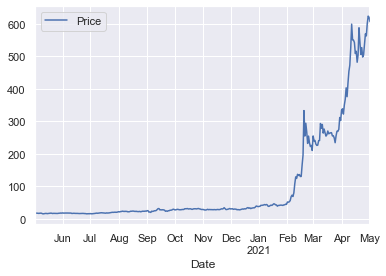

In [55]:
df1.plot()

In [56]:
split_date = pd.Timestamp('2021-04-5')

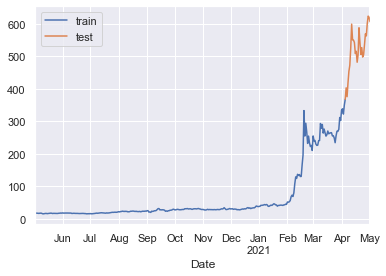

In [60]:
train = df1.loc[:split_date]
test = df1.loc[split_date:]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [85]:
test

,Price
Date,
2021-04-05,367.38
2021-04-06,402.68
2021-04-07,375.48
2021-04-08,417.71
2021-04-09,453.50
2021-04-10,472.26
2021-04-11,525.59
2021-04-12,598.69
2021-04-13,550.14


In [61]:
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [87]:
X_test


array([[1.        ],
       [1.10021292],
       [1.02299503],
       [1.14288148],
       [1.24448545],
       [1.29774308],
       [1.44914123],
       [1.6566643 ],
       [1.51883605],
       [1.51738822],
       [1.49663591],
       [1.39997161],
       [1.41944642],
       [1.32386089],
       [1.38787793],
       [1.62489709],
       [1.49936125],
       [1.39278921],
       [1.45183818],
       [1.36945351],
       [1.38858765],
       [1.47659333],
       [1.57192335],
       [1.55398155],
       [1.66024131],
       [1.72655784],
       [1.71690561]])

In [62]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [63]:
import os
os.getcwd()
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

In [64]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/200
338/338 [==============================] - 0s 687us/step - loss: 0.0014
Epoch 2/200
338/338 [==============================] - 0s 1ms/step - loss: 0.0413
Epoch 3/200
338/338 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 4/200
338/338 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 5/200
338/338 [==============================] - 0s 641us/step - loss: 0.0022
Epoch 6/200
338/338 [==============================] - 0s 1ms/step - loss: 8.4235e-04
Epoch 7/200
338/338 [==============================] - 0s 922us/step - loss: 4.0072e-04
Epoch 8/200
338/338 [==============================] - 0s 729us/step - loss: 2.6514e-04
Epoch 9/200
338/338 [==============================] - 0s 624us/step - loss: 2.2075e-04
Epoch 10/200
338/338 [==============================] - 0s 736us/step - loss: 2.0468e-04
Epoch 11/200
338/338 [==============================] - 0s 1ms/step - loss: 1.9919e-04
Epoch 12/200
338/338 [==============================] - 0s 9

In [65]:
y_pred_test_ann = model.predict(X_test)
y_train_pred_ann = model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_ann)))
r2_train = r2_score(y_train, y_train_pred_ann)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_ann)))
r2_test = r2_score(y_test, y_pred_test_ann)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

The R2 score on the Train set is:	0.982
The Adjusted R2 score on the Train set is:	0.982

The R2 score on the Test set is:	0.400
The Adjusted R2 score on the Test set is:	0.375


In [66]:
model.save('ANN_NonShift.h5')

In [67]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [68]:
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(7, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

Epoch 1/200
338/338 [==============================] - 2s 2ms/step - loss: 4.9878e-04
Epoch 2/200
338/338 [==============================] - 1s 2ms/step - loss: 0.0245A: 0s - loss: 0
Epoch 3/200
338/338 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 4/200
338/338 [==============================] - 0s 1ms/step - loss: 3.2503e-04
Epoch 5/200
338/338 [==============================] - 0s 885us/step - loss: 1.5225e-04
Epoch 6/200
338/338 [==============================] - 1s 2ms/step - loss: 1.4252e-04
Epoch 7/200
338/338 [==============================] - 0s 818us/step - loss: 1.4603e-04
Epoch 8/200
338/338 [==============================] - 0s 851us/step - loss: 1.4718e-04
Epoch 9/200
338/338 [==============================] - 0s 754us/step - loss: 1.4684e-04
Epoch 10/200
338/338 [==============================] - 0s 848us/step - loss: 1.4636e-04
Epoch 00010: early stopping
The R2 score on the Train set is:	0.980
The Adjusted R2 score on the Train set is:	0.980

The 

In [69]:
model_lstm.save('LSTM_NonShift.h5')

In [70]:

model_ann = load_model('ANN_NonShift.h5')
model_lstm = load_model('LSTM_NonShift.h5')

In [71]:
score_ann= model_ann.evaluate(X_test, y_test, batch_size=1)
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

27/27 [==============================] - 0s 698us/step - loss: 0.0625


In [72]:
print('ANN: %f'%score_ann)
print('LSTM: %f'%score_lstm)

ANN: 0.019092
LSTM: 0.062499


In [73]:
y_pred_test_ANN = model_ann.predict(X_test)
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

In [74]:
col1 = pd.DataFrame(y_test, columns=['True'])
col2 = pd.DataFrame(y_pred_test_ANN, columns=['ANN_prediction'])
col3 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])
col4 = pd.DataFrame(history.history['loss'], columns=['Loss_ANN'])
col5 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3, col4, col5], axis=1)
results.to_excel('PredictionResults_ANN-LSTM_NonShift.xlsx')

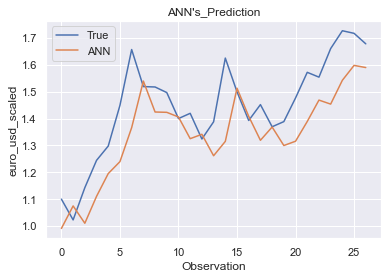

In [75]:

plt.plot(y_test, label='True')
plt.plot(y_pred_test_ANN, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_usd_scaled')
plt.legend()
plt.show()

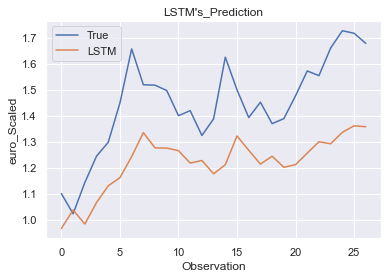

In [76]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('euro_Scaled')
plt.legend()
plt.show()

